In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# switch to C biomass
Qp = 12.5  * 1e-9 / 14
Qp

8.92857142857143e-10

In [3]:
import statsmodels.api as sm

In [4]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp

In [5]:
horder = ['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'DSS-3', 'nitzsch',
       'mit0604', 'k-12', 'HOT5_F3', 'HOT5_C3']


In [6]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='FL0').T.reset_index(drop=True)
data1_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='FL1').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='FL2').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='FL3').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='FL4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='FL5').T.reset_index(drop=True)

In [7]:
pro99_df = pd.read_excel(os.path.join('data', 'Yara_pro99_axenic.xlsx',))

In [8]:
pro99_df.columns

Index(['Date', 'Day', 'Pro99_axenicA', 'Pro99_axenicB', 'Pro99_axenicC'], dtype='object')

In [9]:
pro99_mdf = pro99_df.melt(id_vars=['Date', 'Day'], value_name='FL', var_name='Sample', )

In [10]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data2_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer0').T.reset_index(drop=True)

In [11]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data3_df = pd.read_excel(os.path.join('data', '10CC FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer 1').T.reset_index(drop=True)

In [12]:
meta_df = pd.read_excel(os.path.join('data', '10CC metadata.xlsx'), 
               sheet_name='metadata') #.T.reset_index(drop=True)
meta2_df = pd.read_excel(os.path.join('data', '10CC metadata.xlsx'), 
               sheet_name='metadata2') #.T.reset_index(drop=True)

In [13]:
os.listdir('data')

['10cc FACS results.xlsx',
 '10cc FL.xlsx',
 '10cc metadata.xlsx',
 'Yara_pro99_axenic.xlsx']

In [14]:
 fcm_df = pd.read_excel(os.path.join('data', '10cc FACS results.xlsx'))
 fcm_df

,Unnamed: 0,tube,Sample,id,replicate,transfer,dilution,sybr,problematic,flow,heterotroph,full name,date,transfer day,med4,het,med4 | Count,med4 beads | Count,het | Count
0,0,specimen_1_CC_001+sybr_Tube_002_032.fcs,1A1,1,A,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
1,1,specimen_1_CC_001+sybr_Tube_003_033.fcs,1B1,1,B,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
2,2,specimen_1_CC_001+sybr_Tube_004_034.fcs,1C1,1,C,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
3,4,specimen_1_CC_001+sybr_Tube_006_036.fcs,2B1,2,B,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
4,5,specimen_1_CC_001+sybr_Tube_007_037.fcs,2C1,2,C,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,485,specimen_3_CC+sybr_Tube_032_190.fcs,9C5,9,C,5.0,100.0,sybr,NaN,0.12555,k-12,E. coli,2021-08-29 15:49:00,128.984028,NaN,NaN,NaN,NaN,5.0
467,486,specimen_3_CC+sybr_Tube_033_191.fcs,10C5,10,C,5.0,100.0,sybr,NaN,0.12555,HOT5_F3,Marinovum 5F3,2021-08-29 15:49:00,128.984028,NaN,4.488252e+06,NaN,NaN,5635.0
468,487,specimen_3_CC+sybr_Tube_034_192.fcs,11C5,11,C,5.0,100.0,sybr,NaN,0.12555,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,NaN,1.673437e+06,NaN,NaN,2101.0
469,488,Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,37479.0


In [15]:
fcm_df.columns

Index(['Unnamed: 0', 'tube', 'Sample', 'id', 'replicate', 'transfer',
       'dilution', 'sybr', 'problematic', 'flow', 'heterotroph', 'full name',
       'date', 'transfer day', 'med4', 'het', 'med4 | Count',
       'med4 beads | Count', 'het | Count'],
      dtype='object')

In [16]:
fcm_mdf= fcm_df.loc[fcm_df.problematic != 'yes'].melt(
    id_vars=['tube', 'Sample', 'id', 'replicate', 'transfer',
        'heterotroph', 'full name',
       'date', 'transfer day',],
    value_vars=['med4', 'het',],)


In [17]:
fcm_mdf = fcm_mdf.dropna(subset=['value'])

In [18]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf11= pd.melt(data1_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [19]:
mdf = pd.concat([mdf1, mdf11, mdf2, mdf3, mdf4, mdf5, mdf6, mdf7])

In [20]:
mdf.head()

,day,Sample,FL
0,0.000000,1A0,0.122
1,1.081944,1A0,0.034
2,2.164583,1A0,0.159
3,2.747222,1A0,0.227
4,3.754167,1A0,0.306


In [21]:
mdf['id'] = pd.to_numeric(mdf.Sample.str.slice(start=0, stop=-2))
mdf['replicate'] = mdf.Sample.str.slice(start=-2, stop=-1)
mdf['transfer'] = pd.to_numeric(mdf.Sample.str.slice(start=-1))


In [22]:
mdf = pd.merge(mdf, meta_df, on='id', how='left')
mdf = pd.merge(mdf, meta2_df, on='transfer', how='left')


In [23]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day'],
      dtype='object')

In [24]:
d2 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d2['full name'] = 'Axenic2'
d3 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d3['full name'] = 'Axenic3'
d4 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d4['full name'] = 'Axenic4'



In [25]:
mdf['full name'].unique()

array(['Axenic', 'A. macleodii 1A3', 'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', 'Pseudoalteromonas haloplanktis',
       'Ruegeria pomeroyi', 'Sulfitobacter pseudonitzschiae',
       'Prochlorococcus mit0604', 'E. coli', 'Marinovum 5F3',
       'Roseovarius 5C3'], dtype=object)

In [26]:
axenic = ['Axenic']

group1 = ['A. macleodii 1A3', 'Pseudoalteromonas haloplanktis',]

group2 = ['Sulfitobacter pseudonitzschiae','Ruegeria pomeroyi', ]
group3 = [ #'Prochlorococcus mit0604',
    'E. coli',
         'Marinovum 5F3','Roseovarius 5C3']
group4 = [ 
       'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', ]

mdf.loc[mdf['full name'].isin(axenic), 'Group'] = 'Axenic'
mdf.loc[mdf['full name'].isin(group1), 'Group'] = 'Strong'
mdf.loc[mdf['full name'].isin(group2), 'Group'] = 'Sustained'
mdf.loc[mdf['full name'].isin(group3), 'Group'] = 'Weak'
mdf.loc[mdf['full name'].isin(group4), 'Group'] = 'Inhibited'

horder =  group1 + group2 + group3 + group4 + ['Axenic']
# ['Axenic', 'HOT1A3',  'CIP',  'nitzsch', 'mit0604',
#           'DSS-3','k-12','HOT5_F3', 'HOT5_C3'
#           'HP15', 'Pgall',
#          ]
gorder = ['Sustained', 'Strong', 'Weak', 'Inhibited',   'Axenic',  ]
hpalette1 = sns.color_palette("Dark2", n_colors=len(group1)).as_hex() 
hpalette2 = sns.color_palette("terrain", n_colors=len(group2)).as_hex()  
hpalette3 = sns.color_palette("winter", n_colors=len(group3)+1).as_hex()[1:]  
hpalette4 = sns.color_palette("spring", n_colors=len(group4)).as_hex()

transfer_days = [20, 42, 60, 81, 129]
transfer_days = [42, 60, 81, 129]


hpalette =  hpalette1 + hpalette2 + hpalette3 + hpalette4 + ['black']
gpalette = [ hpalette[7], hpalette[1], hpalette[3], hpalette[5], hpalette[9],]
sns.color_palette(hpalette)


C:\Users\Osnat\AppData\Local\Temp\ipykernel_16800\3358739527.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Axenic' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  mdf.loc[mdf['full name'].isin(axenic), 'Group'] = 'Axenic'


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.3333333333333333, 0.8666666666666667, 0.4666666666666667),
 (0.6666666666666666, 0.5725490196078431, 0.4196078431372549),
 (0.0, 0.4, 0.8),
 (0.0, 0.6, 0.6980392156862745),
 (0.0, 0.8, 0.6),
 (1.0, 0.3333333333333333, 0.6666666666666666),
 (1.0, 0.6666666666666666, 0.3333333333333333),
 (0.0, 0.0, 0.0)]

In [27]:
hpalette

['#1b9e77',
 '#d95f02',
 '#55dd77',
 '#aa926b',
 '#0066cc',
 '#0099b2',
 '#00cc99',
 '#ff55aa',
 '#ffaa55',
 'black']

In [28]:
transfer_days

[42, 60, 81, 129]

In [29]:
fcm_mdf['transfer_success'] = fcm_mdf['Sample'].map((mdf.groupby(['Sample'])['FL'].max() > 0.1))

In [30]:
gorder

['Sustained', 'Strong', 'Weak', 'Inhibited', 'Axenic']

In [31]:
fcm_mdf.variable.unique()
fcm_mdf.variable = fcm_mdf.variable.map({
    'med4' : 'med4 (FCM)', 
    'het' : 'het (FCM)', 
})

In [32]:
fcm_mdf['Sample'] = fcm_mdf['id'].astype('str') + fcm_mdf['replicate'] + '0'

In [33]:
fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])]

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True
...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False


In [34]:
rel_mdf = mdf.loc[(mdf.transfer == 0) & (mdf.id != 8)].copy()

In [35]:
rel_fcmdf = fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])].copy()

In [36]:
rel_mdf['roundday'] = rel_mdf.day.astype(int)
rel_fcmdf['roundday'] = rel_fcmdf['transfer day'].astype(int)


In [37]:
rel_fcmdf

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success,roundday
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True,19
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False,19
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False,19
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True,19
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False,128
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False,128
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False,128
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False,128


In [38]:
train_df = pd.merge(rel_fcmdf, rel_mdf, on=['Sample', 'roundday'], how='left' )

In [39]:
train_df.isna().sum()

tube                0
Sample              0
id_x                0
replicate_x         0
transfer_x          0
heterotroph_x       0
full name_x         0
date_x              0
transfer day_x      0
variable            0
value               0
transfer_success    0
roundday            0
day                 0
FL                  0
id_y                0
replicate_y         0
transfer_y          0
heterotroph_y       0
full name_y         0
date_y              0
transfer day_y      0
Group               0
dtype: int64

In [40]:
train_df = train_df.rename(columns={'value': 'FCM'})

In [41]:
train_df['LOD'] = train_df.FL <= 0.04

In [42]:
train_df['log10FCM'] = np.log10(train_df.FCM)
train_df['log10FL'] = np.log10(train_df.FL.clip(lower=0.04))

In [43]:
x = train_df.loc[~train_df.LOD, 'FL']
y= train_df.loc[~train_df.LOD,'FCM']
#x = sm.add_constant(x)

In [44]:
model = sm.OLS(y, x)

In [45]:
results = model.fit()

In [46]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    FCM   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              385.2
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                    6.74e-42
Time:                        10:11:03   Log-Likelihood:                         -2500.8
No. Observations:                 140   AIC:                                      5004.
Df Residuals:                     139   BIC:                                      5007.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

coefficient of determination: 0.73484356183845
adjusted coefficient of determination: 0.7329359615639065
regression coefficients: FL    2.626432e+07
dtype: float64


In [48]:
train_df['predicted'] = results.predict( train_df['FL'])
train_df['predicted_Bp'] = train_df['predicted']* Qp * 1e3
train_df['ref_Bp'] = train_df['FCM']* Qp * 1e3

In [49]:
predicted_below_LOD = results.predict([0.04, 0.1])
f'{predicted_below_LOD[0]:.2e}, {predicted_below_LOD[1]:.2e}, '

'1.05e+06, 2.63e+06, '

In [50]:
predicted_below_LOD * Qp * 1e3, 1e6* Qp * 1e3, 

(array([0.93801129, 2.34502821]), 0.8928571428571429)

In [51]:
mdf['predicted'] = results.predict(mdf['FL'])

In [52]:
mdf['ref_Bp[N]'] = mdf['predicted']* Qp * 1e3
mdf['ref_Bp[C]'] = mdf['ref_Bp[N]'] * 6.625


In [53]:
pro99_mdf = pro99_mdf.rename(columns={'Day': 'day'})
pro99_mdf['Group'] = 'Axenic_PRO99'


In [54]:
pro99_mdf['full name'] = 'Axenic_PRO99'


In [55]:
pro99_mdf['predicted'] = results.predict(pro99_mdf['FL'])
pro99_mdf['ref_Bp[N]'] = pro99_mdf['predicted']* Qp * 1e3
pro99_mdf['ref_Bp[C]'] = pro99_mdf['ref_Bp[N]'] * 6.625


In [56]:
pro99_mdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]'],
      dtype='object')

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='FL', ylabel='ref_Bp'>

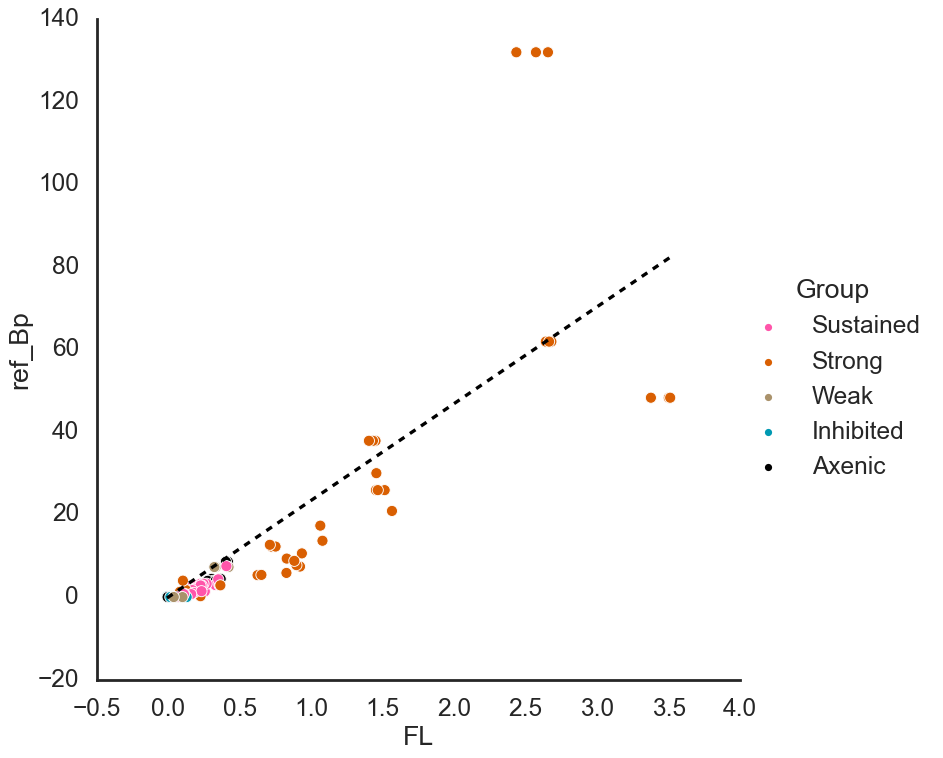

In [57]:
sns.relplot(data=train_df, x='FL', y='ref_Bp', #s=100, 
           height=10,
           #hue='Gr',
            s=100,
            hue='Group', hue_order=gorder, palette=gpalette,
          )

sns.lineplot(data=train_df, x='FL', y='predicted_Bp', color='black', ls='--', legend=False)
#plt.xscale('log')
#plt.yscale('log')

In [58]:
pro99_mdf = pro99_mdf.rename(columns={'Day': 'day'})

In [59]:
pro99_mdf['Group'] = 'Axenic_PRO99'
pro99_mdf['id'] = 'Axenic_PRO99'

In [60]:
pro99_mdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]', 'id'],
      dtype='object')

In [61]:
#pmdf['LOD'] = pmdf.FL <= 0.05

In [62]:
pd.concat([mdf.loc[mdf.transfer.isin([0])], pro99_mdf])

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,predicted,ref_Bp[N],ref_Bp[C],Date
0,0.000000,1A0,0.122,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,3.204247e+06,2.860934,18.953691,NaT
1,1.081944,1A0,0.034,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.929867e+05,0.797310,5.282176,NaT
2,2.164583,1A0,0.159,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,4.176026e+06,3.728595,24.701941,NaT
3,2.747222,1A0,0.227,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,5.962000e+06,5.323214,35.266293,NaT
4,3.754167,1A0,0.306,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.036881e+06,7.175786,47.539584,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,80.062500,Pro99_axenicC,0.105,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,2.757753e+06,2.462280,16.312603,2023-03-30 15:00:00
170,83.930556,Pro99_axenicC,0.129,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,3.388097e+06,3.025086,20.041197,2023-04-03 11:50:00
171,85.796528,Pro99_axenicC,0.096,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,2.521374e+06,2.251227,14.914379,2023-04-05 08:37:00
172,91.922222,Pro99_axenicC,0.100,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,2.626432e+06,2.345028,15.535812,2023-04-11 11:38:00


C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

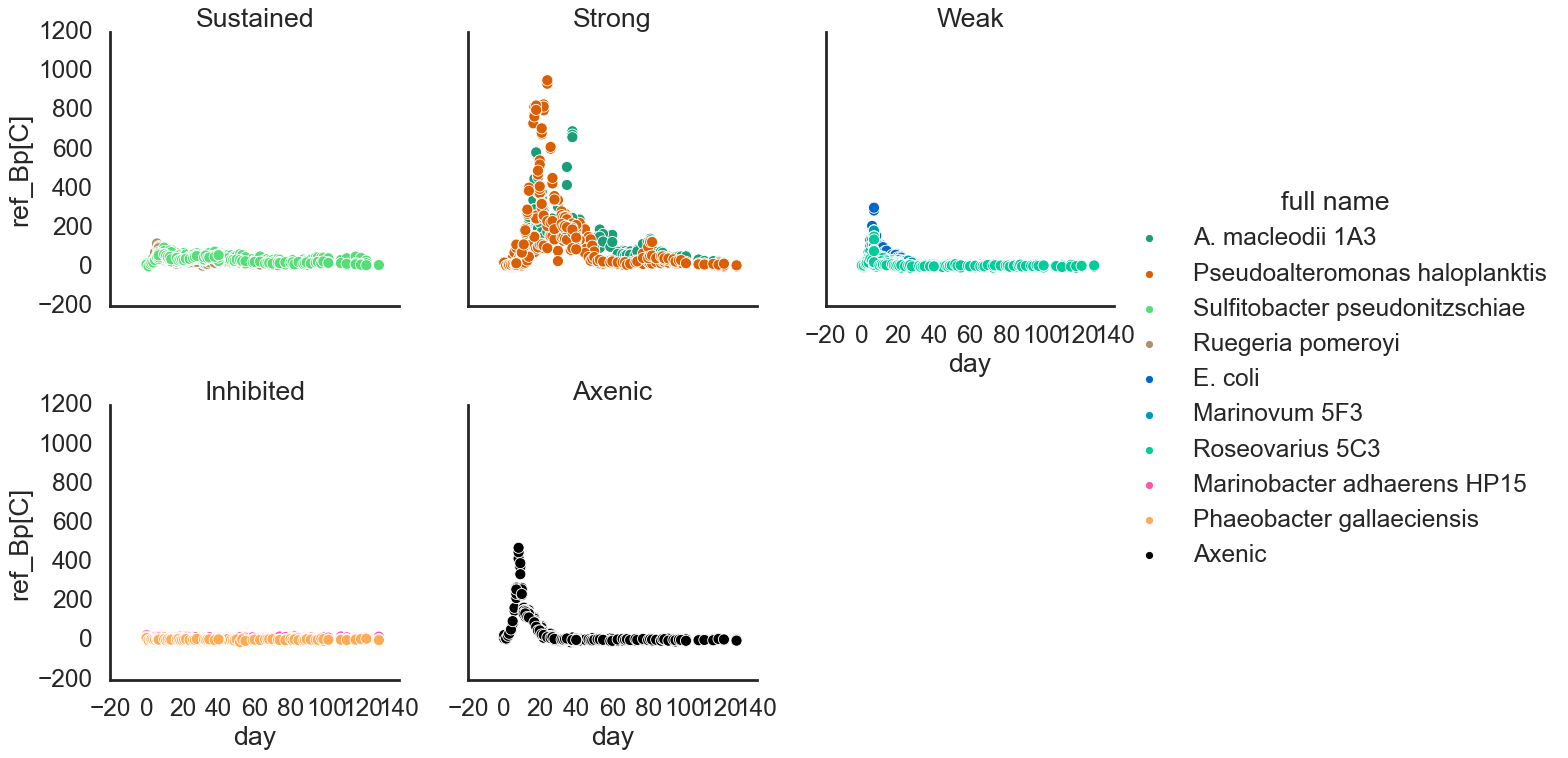

In [63]:
sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
                           
    x='day', y='ref_Bp[C]', #s=100, 
           #height=10,
           #hue='Group',
            s=100,
            col='Group', col_wrap=3, col_order=gorder ,
            hue='full name', palette=hpalette, hue_order=horder,
            #style='LOD',
          ).set_titles(col_template='{col_name}')

#sns.lineplot(data=train_df, x='FL', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim((0,100))

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

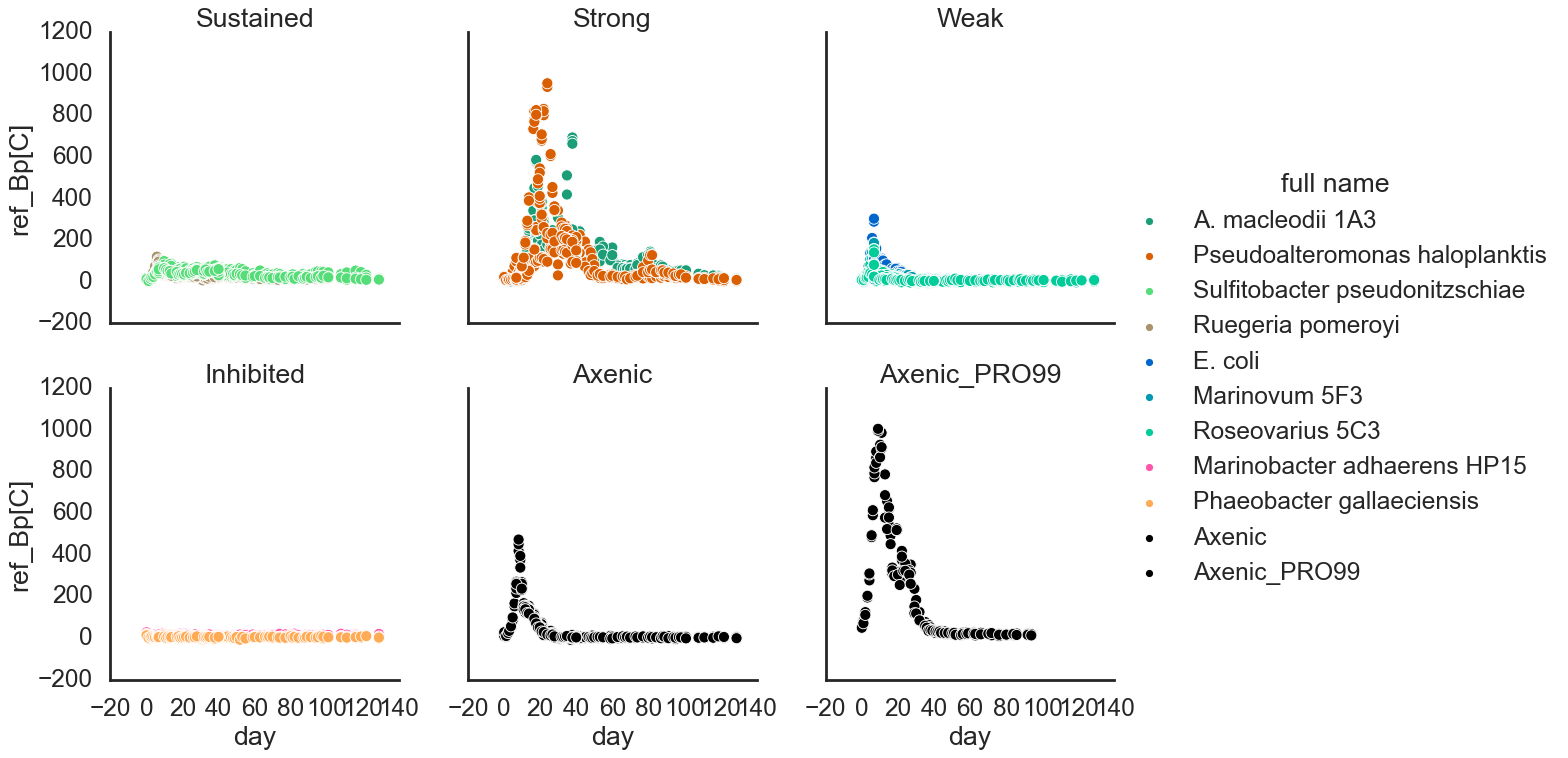

In [64]:
sns.relplot(
    data=pd.concat([mdf.loc[mdf.transfer.isin([0])], pro99_mdf],ignore_index=True ),
                           x='day', y='ref_Bp[C]', #s=100, 
           #height=10,
           #hue='Group',
            s=100,
            col='Group', col_wrap=3, col_order=gorder + ['Axenic_PRO99'],
            hue='full name', palette=hpalette + ['black'], hue_order=horder + ['Axenic_PRO99'],
            #style='LOD',
          ).set_titles(col_template='{col_name}')

#sns.lineplot(data=train_df, x='FL', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim((0,100))

In [65]:
gpalette

['#ff55aa', '#d95f02', '#aa926b', '#0099b2', 'black']

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

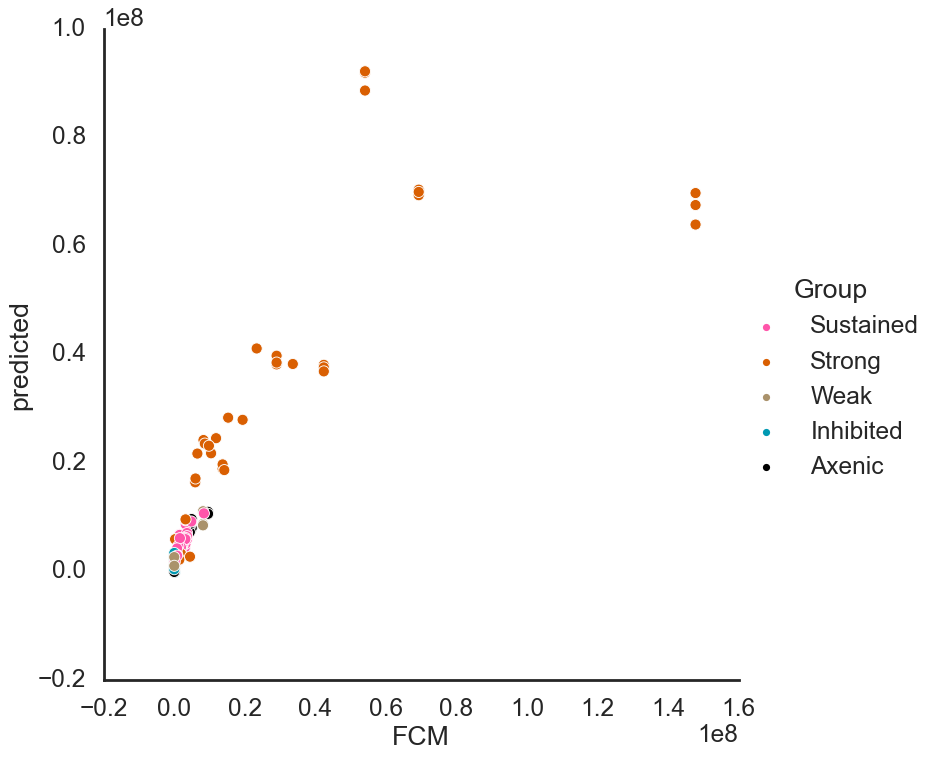

In [66]:
sns.relplot(data=train_df, x='FCM', y='predicted', #s=100, 
           height=10,
           hue='Group', palette=gpalette, hue_order=gorder,
            s=100,
          #  hue='Group'
          )

#sns.lineplot(data=train_df, x='FCM', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')

In [67]:
train_df

,tube,Sample,id_x,replicate_x,transfer_x,heterotroph_x,full name_x,date_x,transfer day_x,variable,...,full name_y,date_y,transfer day_y,Group,LOD,log10FCM,log10FL,predicted,predicted_Bp,ref_Bp
0,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.981440,-0.396856,1.053199e+07,9.403563,8.555038
1,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.981440,-0.379864,1.095222e+07,9.778768,8.555038
2,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.981440,-0.394695,1.058452e+07,9.450464,8.555038
3,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.693595,-0.519993,7.931823e+06,7.081985,4.409371
4,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.693595,-0.518557,7.958088e+06,7.105435,4.409371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),...,Pseudoalteromonas haloplanktis,2021-04-22 16:12:00,0.0,Strong,False,4.806391,-1.214670,1.602123e+06,1.430467,0.057171
157,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),...,Ruegeria pomeroyi,2021-04-22 16:12:00,0.0,Sustained,False,5.905975,-0.962574,2.862810e+06,2.556081,0.719047
158,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),...,Sulfitobacter pseudonitzschiae,2021-04-22 16:12:00,0.0,Sustained,False,5.115386,-1.148742,1.864766e+06,1.664970,0.116458
159,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),...,E. coli,2021-04-22 16:12:00,0.0,Weak,False,3.168024,-1.004365,2.600167e+06,2.321578,0.001315


In [68]:
mdf['t'] = mdf['day'] * 3600 * 24

In [69]:
pro99_mdf['t'] = pro99_mdf['day'] * 3600 * 24

In [70]:
mdf.head()

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,predicted,ref_Bp[N],ref_Bp[C],t
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,3.204247e+06,2.860934,18.953691,0.0
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.929867e+05,0.797310,5.282176,93480.0
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,4.176026e+06,3.728595,24.701941,187020.0
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,5.962000e+06,5.323214,35.266293,237360.0
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.036881e+06,7.175786,47.539584,324360.0


In [71]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day', 'Group', 'predicted', 'ref_Bp[N]',
       'ref_Bp[C]', 't'],
      dtype='object')

In [81]:
pmdf = mdf.groupby([ 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group','t','day',])[['FL', 'ref_Bp[N]','ref_Bp[C]',]].mean().reset_index()



In [90]:
# some samples were dropped midway
problematic_samples = pmdf.loc[pmdf.isna().any(axis=1), 'Sample'].unique()
pmdf = pmdf.loc[~pmdf.Sample.isin(problematic_samples)]
pmdf.loc[pmdf.isna().any(axis=1)]


,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [103]:
problematic_samples

array(['10A1', '10B1', '10C1', '11A1', '11B1', '11C1', '7A1', '7B1',
       '7C1', '9A1', '9B1', '9C1'], dtype=object)

In [102]:
pmdf.loc[pmdf.Sample.isin(problematic_samples)]

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],ref_Bp[N]_clip


In [91]:
pmdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845
1,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514
2,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332
3,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685
4,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,9C5,9,C,5,128.984028,k-12,E. coli,Weak,4228200.0,48.937500,0.015,0.351754,2.330372
6926,9C5,9,C,5,128.984028,k-12,E. coli,Weak,4476660.0,51.813194,-0.014,-0.328304,-2.175014
6927,9C5,9,C,5,128.984028,k-12,E. coli,Weak,4560540.0,52.784028,-0.028,-0.656608,-4.350027
6928,9C5,9,C,5,128.984028,k-12,E. coli,Weak,5179500.0,59.947917,-0.014,-0.328304,-2.175014


In [92]:
pmdf.loc[pmdf.transfer.isin([0]) & ~pmdf.id.isin([8])].to_excel('reference_10cc.xlsx', index=False)


In [94]:
pmdf.loc[~pmdf.id.isin([8])].to_excel('reference_10cc_all.xlsx', index=False)


In [75]:
pmdf.loc[mdf.transfer.isin([0]) & ~pmdf.id.isin([8])].groupby(['Sample', 't']).size().sort_values()

Sample  t        
10A0    0.0          1
4A0     4217220.0    1
        4140180.0    1
        4043040.0    1
        3867180.0    1
                    ..
1B0     5672280.0    1
        5433900.0    1
        5176380.0    1
        4734180.0    1
6C0     1108560.0    1
Length: 1716, dtype: int64

In [76]:
pro99_mdf.to_excel('reference_pro99_axenic.xlsx', index=False)


In [77]:
pmdf.loc[pmdf.transfer.isin([0]) & pmdf.id.isin([1])].to_excel('reference_10cc_axenic.xlsx', index=False)


In [78]:
mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,predicted,ref_Bp[N],ref_Bp[C],t
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,3.204247e+06,2.860934,18.953691,0.0
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,8.929867e+05,0.797310,5.282176,93480.0
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,4.176026e+06,3.728595,24.701941,187020.0
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,5.962000e+06,5.323214,35.266293,237360.0
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,8.036881e+06,7.175786,47.539584,324360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9628,48.937500,11C5,0.019,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,4.990220e+05,0.445555,2.951804,4228200.0
9629,51.813194,11C5,0.028,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,7.354008e+05,0.656608,4.350027,4476660.0
9630,52.784028,11C5,0.058,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,1.523330e+06,1.360116,9.010771,4560540.0
9631,59.947917,11C5,0.033,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,8.667224e+05,0.773859,5.126818,5179500.0


C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

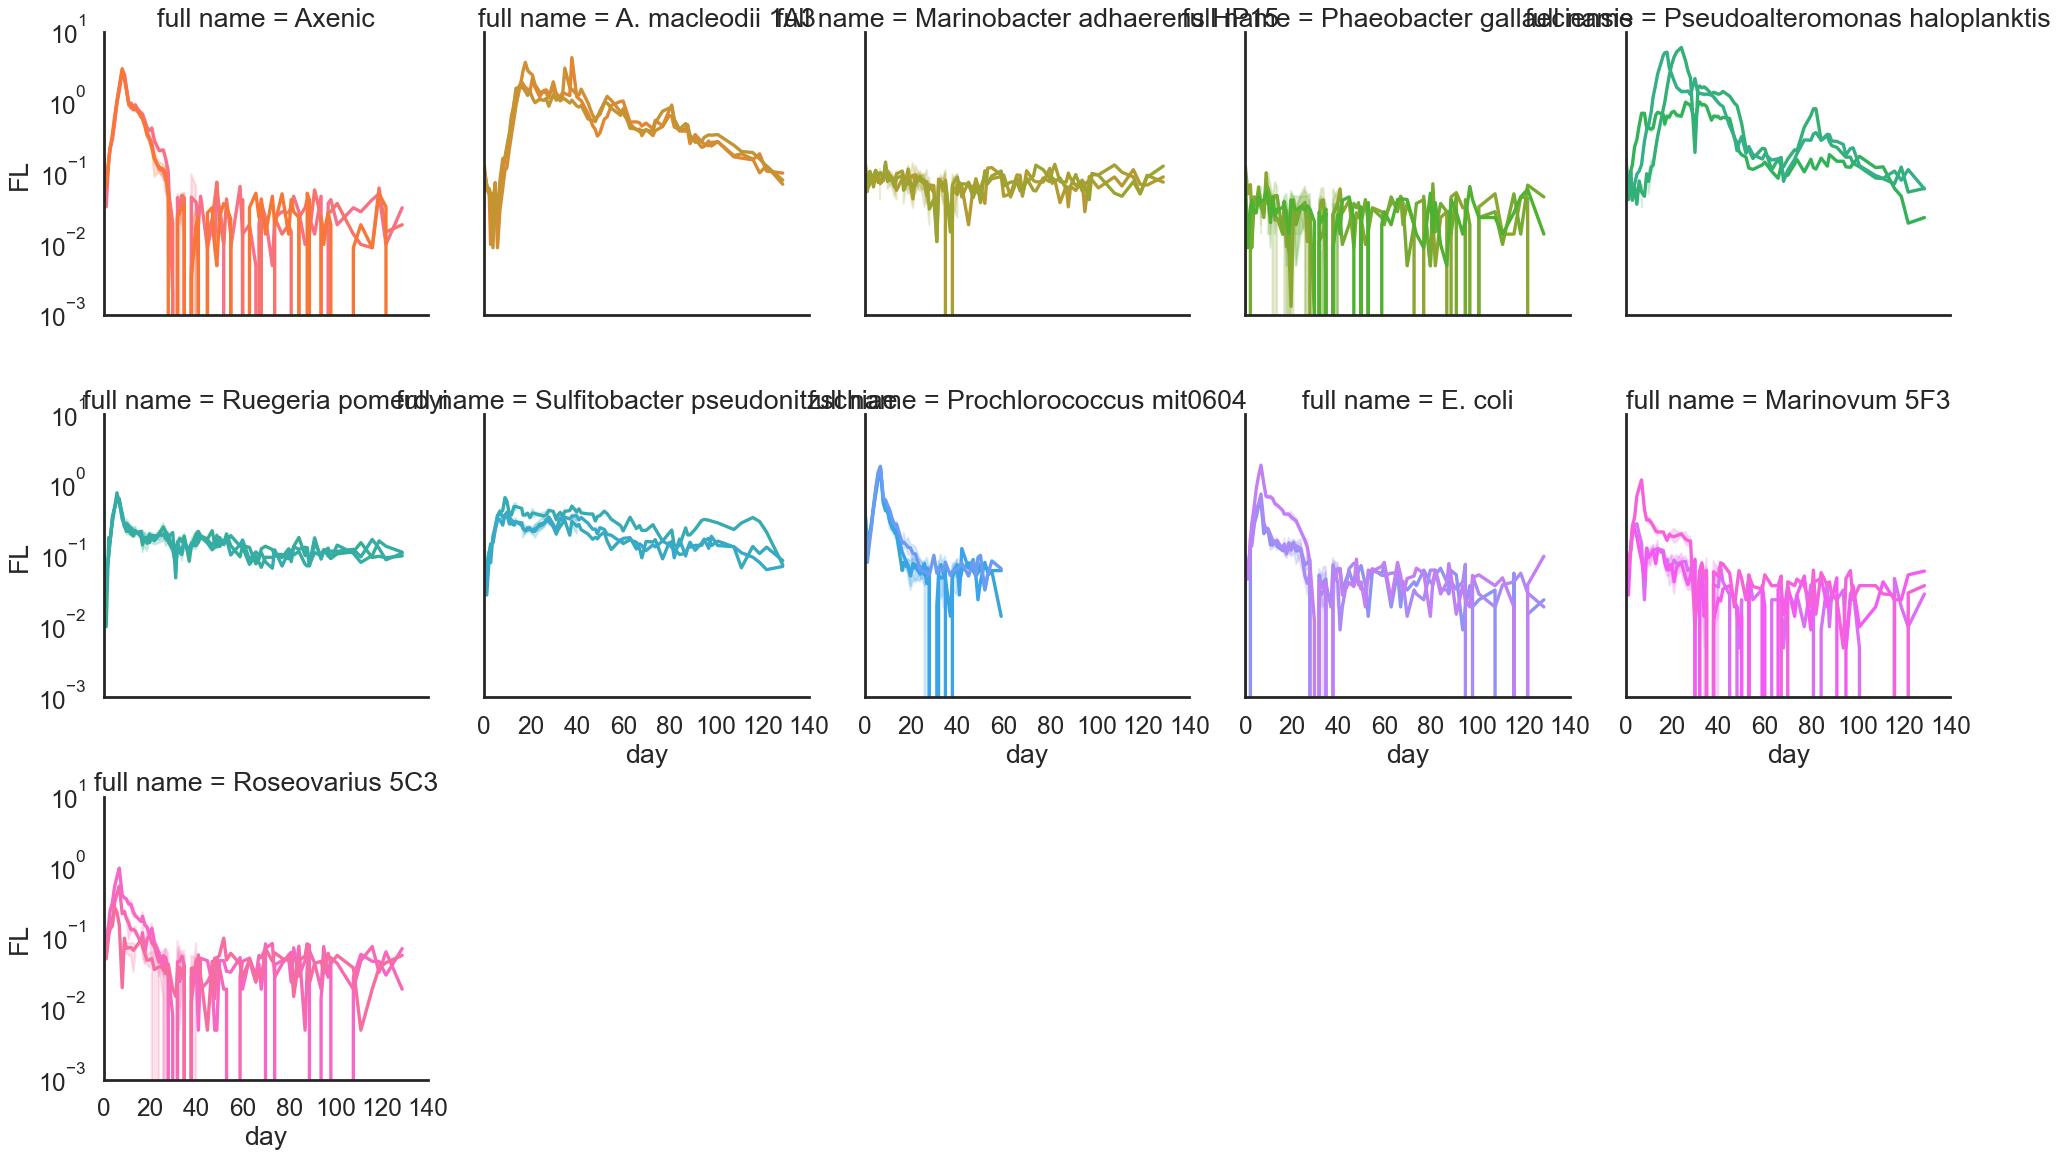

In [79]:
sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
    x='day', y='FL',
    col='full name', hue='Sample', col_wrap=5, 
    legend=False, kind='line',
    
)
plt.yscale('log')

C:\Users\Osnat\AppData\Local\Temp\ipykernel_16800\3928932404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmdf['ref_Bp[N]_clip'] = pmdf['ref_Bp[N]'].clip(lower=1)
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: Futur

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

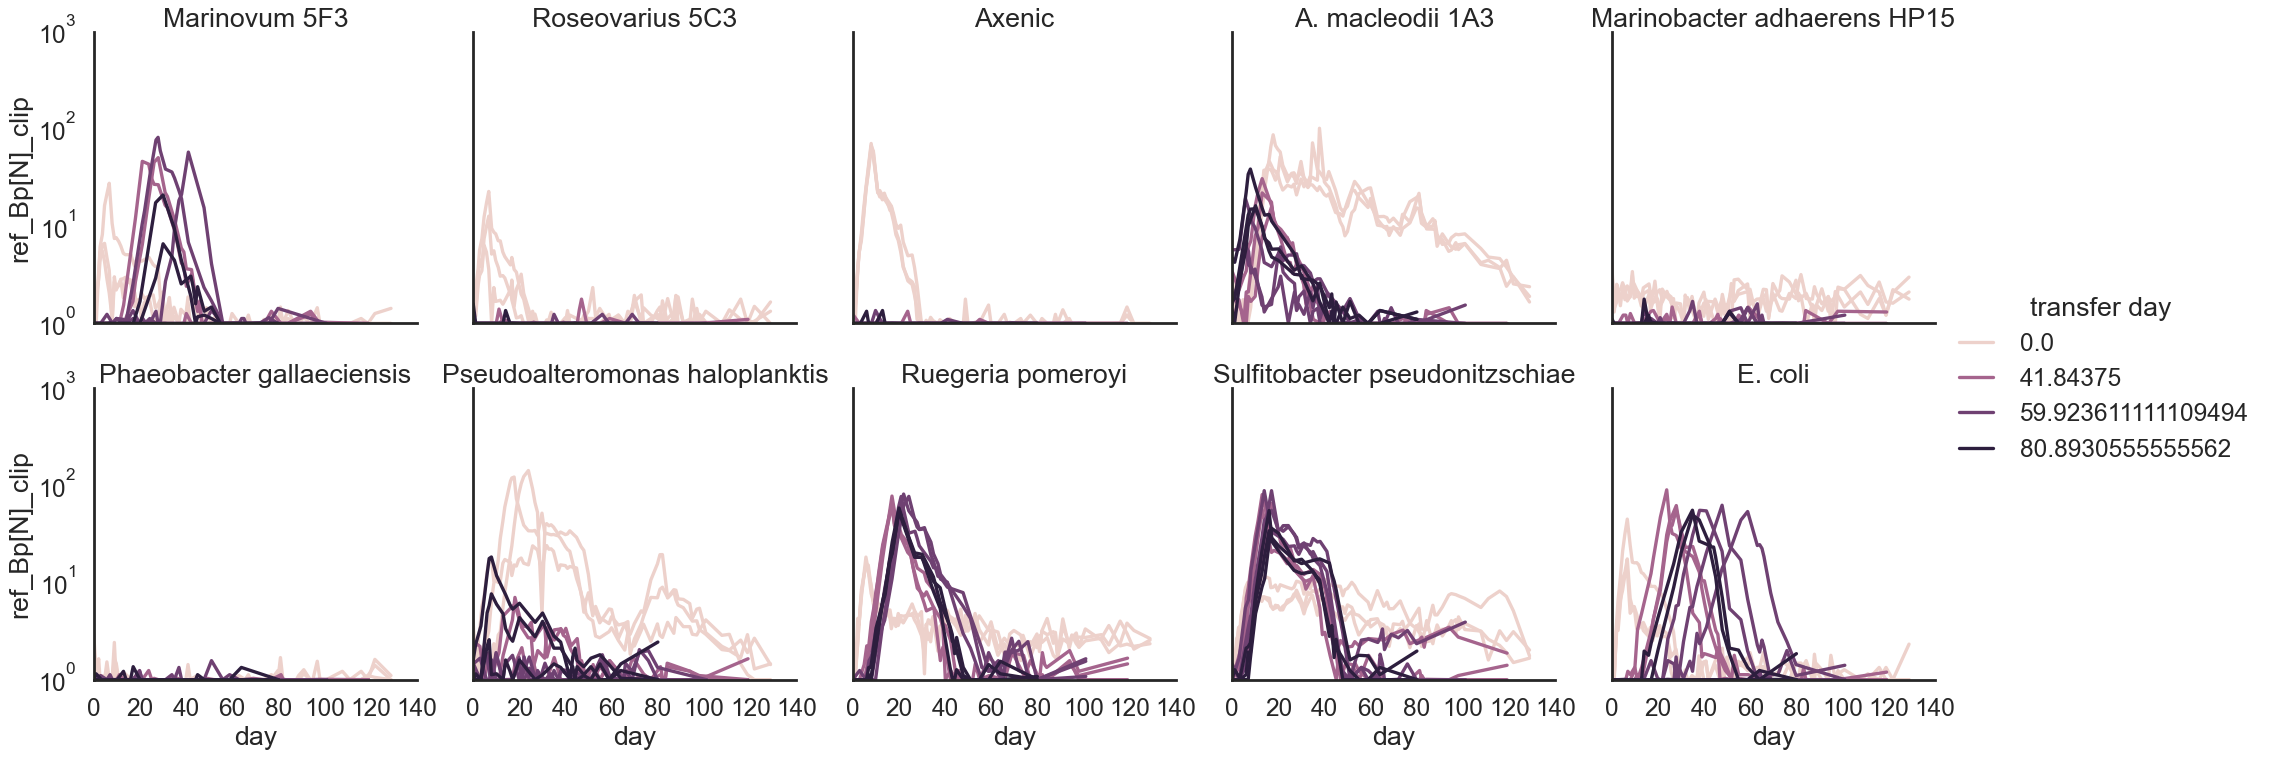

In [113]:
pmdf['ref_Bp[N]_clip'] = pmdf['ref_Bp[N]'].clip(lower=1)
sns.relplot(
    data=pmdf.loc[~pmdf.id.isin([8])& ~pmdf.transfer.isin([1,5])  ],
    x='day', y='ref_Bp[N]_clip',
    col='full name', hue='transfer day', col_wrap=5, 
    #legend=False, 
    kind='line',
    estimator=None, units='Sample',
    
).set_titles(col_template='{col_name}')
plt.yscale('log')

C:\Users\Osnat\AppData\Local\Temp\ipykernel_16800\3883172450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmdf['ref_Bp[N]_clip'] = pmdf['ref_Bp[N]'].clip(lower=1)
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: Futur

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

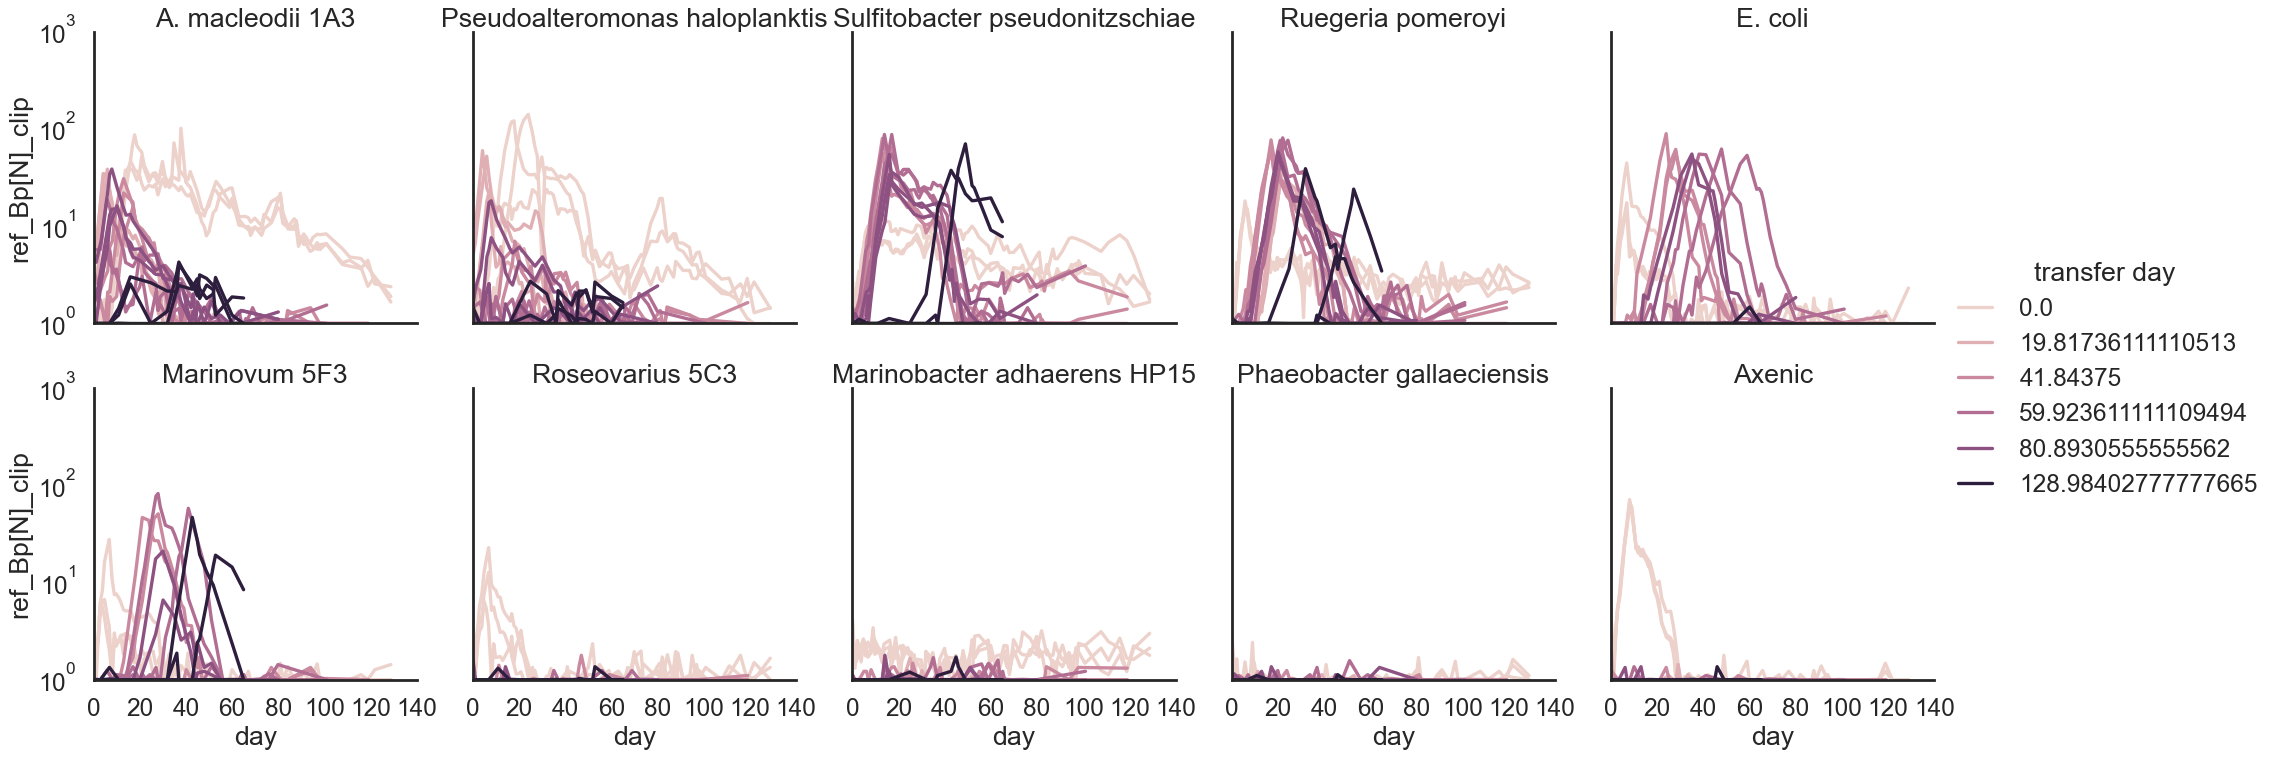

In [115]:
pmdf['ref_Bp[N]_clip'] = pmdf['ref_Bp[N]'].clip(lower=1)
sns.relplot(
    data=pmdf.loc[~pmdf.id.isin([8])  ],
    x='day', y='ref_Bp[N]_clip',
    col='full name', hue='transfer day', col_wrap=5, 
    col_order=horder,
    #legend=False, 
    kind='line',
    estimator=None, units='Sample',
    
).set_titles(col_template='{col_name}')
plt.yscale('log')

In [116]:
pmdf.groupby('transfer day').day.max()

transfer day
0.000000      128.767361
19.817361      59.980556
41.843750     119.040972
59.923611     100.952083
80.893056      79.987500
128.984028     64.945139
Name: day, dtype: float64